In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
# Assuming the file is in the current directory
df = pd.read_csv('tracks_features.csv')

In [4]:
# Display basic information about the dataset
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7804 entries, 0 to 7803
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7804 non-null   object 
 1   name              7804 non-null   object 
 2   album             7804 non-null   object 
 3   album_id          7804 non-null   object 
 4   artists           7804 non-null   object 
 5   artist_ids        7804 non-null   object 
 6   track_number      7804 non-null   int64  
 7   disc_number       7804 non-null   int64  
 8   explicit          7804 non-null   bool   
 9   danceability      7804 non-null   float64
 10  energy            7804 non-null   float64
 11  key               7804 non-null   int64  
 12  loudness          7804 non-null   float64
 13  mode              7804 non-null   int64  
 14  speechiness       7804 non-null   float64
 15  acousticness      7804 non-null   float64
 16  instrumentalness  780

In [5]:
# Display the first few rows of the dataset
print("\nFirst 5 rows of the dataset:")
df.head()


First 5 rows of the dataset:


,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02


In [6]:
# Check for missing values
print("\nMissing values in each column:")
df.isnull().sum()


Missing values in each column:


,0
id,0
name,0
album,0
album_id,0
artists,0
artist_ids,0
track_number,0
disc_number,0
explicit,0
danceability,0


In [7]:
# Step 1: Drop unnecessary columns
df_clean = df.drop(['id', 'album_id', 'artist_ids', 'track_number', 'disc_number', 'time_signature'], axis=1)
print("\nColumns after dropping unnecessary ones:")
print(df_clean.columns.tolist())


Columns after dropping unnecessary ones:
['name', 'album', 'artists', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'year', 'release_date']


In [8]:
# Step 2: Clean up the artists column
# First, check the current format
print("\nSample artists entries before cleaning:")
df_clean['artists'].head()


Sample artists entries before cleaning:


,artists
0,['Rage Against The Machine']
1,['Rage Against The Machine']
2,['Rage Against The Machine']
3,['Rage Against The Machine']
4,['Rage Against The Machine']


In [9]:
# Clean up artists column - remove brackets and quotes
df_clean['artists'] = df_clean['artists'].apply(
    lambda x: x.strip("[]'\"").replace("'", "").replace('"', '') if isinstance(x, str) else x
)

In [10]:
print("\nSample artists entries after cleaning:")
df_clean['artists'].head()


Sample artists entries after cleaning:


,artists
0,Rage Against The Machine
1,Rage Against The Machine
2,Rage Against The Machine
3,Rage Against The Machine
4,Rage Against The Machine


In [11]:
# Step 3: Extract primary artist for easier analysis
df_clean['primary_artist'] = df_clean['artists'].apply(
    lambda x: x.split(',')[0].strip() if isinstance(x, str) and ',' in x else x
)

In [12]:
print("\nSample primary artists:")
df_clean['primary_artist'].head()


Sample primary artists:


,primary_artist
0,Rage Against The Machine
1,Rage Against The Machine
2,Rage Against The Machine
3,Rage Against The Machine
4,Rage Against The Machine


In [13]:
# Step 4: Round numerical audio features to 2 decimal places
audio_features = ['danceability', 'energy', 'loudness', 'speechiness',
                 'acousticness', 'instrumentalness', 'liveness', 'valence']

In [14]:
for feature in audio_features:
    df_clean[feature] = df_clean[feature].round(2)

In [15]:
# Check the results of rounding
print("\nSample audio features after rounding:")
df_clean[audio_features].head()


Sample audio features after rounding:


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence
0,0.47,0.98,-5.40,0.07,0.03,0.0,0.36,0.50
1,0.60,0.96,-5.76,0.19,0.01,0.0,0.16,0.49
2,0.32,0.97,-5.42,0.48,0.02,0.0,0.12,0.37
3,0.44,0.97,-5.83,0.24,0.16,0.0,0.12,0.57
4,0.43,0.93,-6.73,0.07,0.00,0.1,0.08,0.54


In [16]:
# Step 5: Convert tempo to integer
df_clean["tempo"] = df_clean["tempo"].astype(int)

In [17]:
print("\nSample tempo values after conversion:")
df_clean["tempo"].head()


Sample tempo values after conversion:


,tempo
0,117
1,103
2,149
3,96
4,127


In [18]:
# Step 6: Create duration in seconds column
df_clean["duration_s"] = (df_clean["duration_ms"] / 1000).astype(int)

In [19]:
# Compare milliseconds vs seconds
print("\nDuration comparison (ms vs s):")
comparison = pd.DataFrame({
    'duration_ms': df_clean["duration_ms"].head(),
    'duration_s': df_clean["duration_s"].head()
})
print(comparison)


Duration comparison (ms vs s):
   duration_ms  duration_s
0       210133         210
1       206200         206
2       298893         298
3       213640         213
4       205600         205


In [20]:
# Drop the milliseconds column
df_clean = df_clean.drop("duration_ms", axis=1)

In [21]:
# Step 7: Handle the release_date column
print("\nRelease date format before conversion:")
df_clean['release_date'].head()


Release date format before conversion:


,release_date
0,1999-11-02
1,1999-11-02
2,1999-11-02
3,1999-11-02
4,1999-11-02


In [22]:
# Convert to datetime
df_clean['release_date'] = pd.to_datetime(df_clean['release_date'], errors='coerce')

In [23]:
# Extract components
df_clean['release_year'] = df_clean['release_date'].dt.year
df_clean['release_month'] = df_clean['release_date'].dt.month
df_clean['release_day'] = df_clean['release_date'].dt.day

In [24]:
print("\nDate components after extraction:")
date_components = df_clean[['release_date', 'release_year', 'release_month', 'release_day']].head()
print(date_components)


Date components after extraction:
  release_date  release_year  release_month  release_day
0   1999-11-02        1999.0           11.0          2.0
1   1999-11-02        1999.0           11.0          2.0
2   1999-11-02        1999.0           11.0          2.0
3   1999-11-02        1999.0           11.0          2.0
4   1999-11-02        1999.0           11.0          2.0


In [25]:
# Step 8: Convert year to string for consistency
df_clean['year'] = df_clean['year'].astype(str)

In [26]:
# Step 9: Create a decade column
df_clean['decade'] = df_clean['year'].apply(
    lambda x: str(int(float(x)) // 10 * 10) + 's' if x.replace('.', '', 1).isdigit() else None
)

In [27]:
print("\nDecade examples:")
decade_examples = df_clean[['year', 'decade']].head(10)
print(decade_examples)


Decade examples:
   year decade
0  1999  1990s
1  1999  1990s
2  1999  1990s
3  1999  1990s
4  1999  1990s
5  1999  1990s
6  1999  1990s
7  1999  1990s
8  1999  1990s
9  1999  1990s


In [28]:
# Step 10: Handle missing values
print("\nMissing values before handling:")
print(df_clean.isnull().sum())


Missing values before handling:
name                   0
album                  0
artists                0
explicit               0
danceability           0
energy                 0
key                    0
loudness               0
mode                   0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
year                   0
release_date        1385
primary_artist         0
duration_s             0
release_year        1385
release_month       1385
release_day         1385
decade                 0
dtype: int64


In [29]:
# Drop rows with missing values in critical columns
critical_columns = ['name', 'album', 'artists', 'danceability', 'energy']
df_clean = df_clean.dropna(subset=critical_columns)

In [31]:
# Fill remaining NaNs with appropriate values
df_clean = df_clean.fillna({
    'mode': 0,
    'key': -1,
    'explicit': False
})

In [32]:
print("\nMissing values after handling:")
print(df_clean.isnull().sum())


Missing values after handling:
name                   0
album                  0
artists                0
explicit               0
danceability           0
energy                 0
key                    0
loudness               0
mode                   0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
year                   0
release_date        1385
primary_artist         0
duration_s             0
release_year        1385
release_month       1385
release_day         1385
decade                 0
dtype: int64


In [33]:
# Step 11: Create a unique song identifier
df_clean['song_id'] = df_clean.apply(
    lambda row: f"{row['primary_artist']}-{row['name']}".lower().replace(' ', '_'), axis=1
)

In [34]:
print("\nSample song IDs:")
df_clean[['name', 'primary_artist', 'song_id']].head()


Sample song IDs:


,name,primary_artist,song_id
0,Testify,Rage Against The Machine,rage_against_the_machine-testify
1,Guerrilla Radio,Rage Against The Machine,rage_against_the_machine-guerrilla_radio
2,Calm Like a Bomb,Rage Against The Machine,rage_against_the_machine-calm_like_a_bomb
3,Mic Check,Rage Against The Machine,rage_against_the_machine-mic_check
4,Sleep Now In the Fire,Rage Against The Machine,rage_against_the_machine-sleep_now_in_the_fire


In [35]:
# Final check of the cleaned dataset
print("\nFinal cleaned dataset info:")
df_clean.info()


Final cleaned dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7804 entries, 0 to 7803
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              7804 non-null   object        
 1   album             7804 non-null   object        
 2   artists           7804 non-null   object        
 3   explicit          7804 non-null   bool          
 4   danceability      7804 non-null   float64       
 5   energy            7804 non-null   float64       
 6   key               7804 non-null   int64         
 7   loudness          7804 non-null   float64       
 8   mode              7804 non-null   int64         
 9   speechiness       7804 non-null   float64       
 10  acousticness      7804 non-null   float64       
 11  instrumentalness  7804 non-null   float64       
 12  liveness          7804 non-null   float64       
 13  valence           7804 non-null   float64       


In [36]:
print("\nFinal cleaned dataset sample:")
df_clean.head()


Final cleaned dataset sample:


,name,album,artists,explicit,danceability,energy,key,loudness,mode,speechiness,...,tempo,year,release_date,primary_artist,duration_s,release_year,release_month,release_day,decade,song_id
0,Testify,The Battle Of Los Angeles,Rage Against The Machine,False,0.47,0.98,7,-5.40,1,0.07,...,117,1999,1999-11-02,Rage Against The Machine,210,1999.0,11.0,2.0,1990s,rage_against_the_machine-testify
1,Guerrilla Radio,The Battle Of Los Angeles,Rage Against The Machine,True,0.60,0.96,11,-5.76,1,0.19,...,103,1999,1999-11-02,Rage Against The Machine,206,1999.0,11.0,2.0,1990s,rage_against_the_machine-guerrilla_radio
2,Calm Like a Bomb,The Battle Of Los Angeles,Rage Against The Machine,False,0.32,0.97,7,-5.42,1,0.48,...,149,1999,1999-11-02,Rage Against The Machine,298,1999.0,11.0,2.0,1990s,rage_against_the_machine-calm_like_a_bomb
3,Mic Check,The Battle Of Los Angeles,Rage Against The Machine,True,0.44,0.97,11,-5.83,0,0.24,...,96,1999,1999-11-02,Rage Against The Machine,213,1999.0,11.0,2.0,1990s,rage_against_the_machine-mic_check
4,Sleep Now In the Fire,The Battle Of Los Angeles,Rage Against The Machine,False,0.43,0.93,2,-6.73,1,0.07,...,127,1999,1999-11-02,Rage Against The Machine,205,1999.0,11.0,2.0,1990s,rage_against_the_machine-sleep_now_in_the_fire


In [37]:
# Display summary statistics
print("\nSummary statistics for numerical features:")
df_clean.describe()


Summary statistics for numerical features:


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,release_date,duration_s,release_year,release_month,release_day
count,7804.000000,7804.000000,7804.000000,7804.000000,7804.000000,7804.000000,7804.000000,7804.000000,7804.000000,7804.000000,7804.000000,6419,7804.000000,6419.000000,6419.000000,6419.000000
mean,0.505370,0.571216,5.218734,-10.816403,0.686058,0.085987,0.345830,0.232610,0.209944,0.458004,118.666838,2003-11-10 01:04:23.031624832,248.079575,2003.388067,6.233993,13.524381
min,0.000000,0.000000,0.000000,-52.480000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1954-01-01 00:00:00,1.000000,1954.000000,1.000000,1.000000
25%,0.380000,0.350000,2.000000,-13.480000,0.000000,0.030000,0.020000,0.000000,0.100000,0.230000,95.000000,1997-09-16 00:00:00,181.000000,1997.000000,3.000000,5.000000
50%,0.520000,0.600000,5.000000,-9.240000,1.000000,0.040000,0.190000,0.000000,0.130000,0.450000,117.000000,2003-01-21 00:00:00,227.000000,2003.000000,6.000000,14.000000
75%,0.640000,0.820000,8.000000,-6.420000,1.000000,0.070000,0.690000,0.500000,0.270000,0.670000,139.000000,2010-11-16 00:00:00,281.000000,2010.000000,9.000000,21.000000
max,0.970000,1.000000,11.000000,3.800000,1.000000,0.960000,1.000000,1.000000,1.000000,0.980000,217.000000,2020-12-04 00:00:00,6054.000000,2020.000000,12.000000,31.000000
std,0.185937,0.282386,3.533361,6.340001,0.464123,0.119873,0.356754,0.353786,0.191278,0.266084,31.473680,NaN,175.387899,9.367238,3.476147,9.155549


In [38]:
# Save the cleaned dataset
df_clean.to_csv('cleaned_tracks_features.csv', index=False)
print("\nCleaned dataset saved to 'cleaned_tracks_features.csv'")


Cleaned dataset saved to 'cleaned_tracks_features.csv'


In [39]:
# Visualize key distributions after cleaning
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

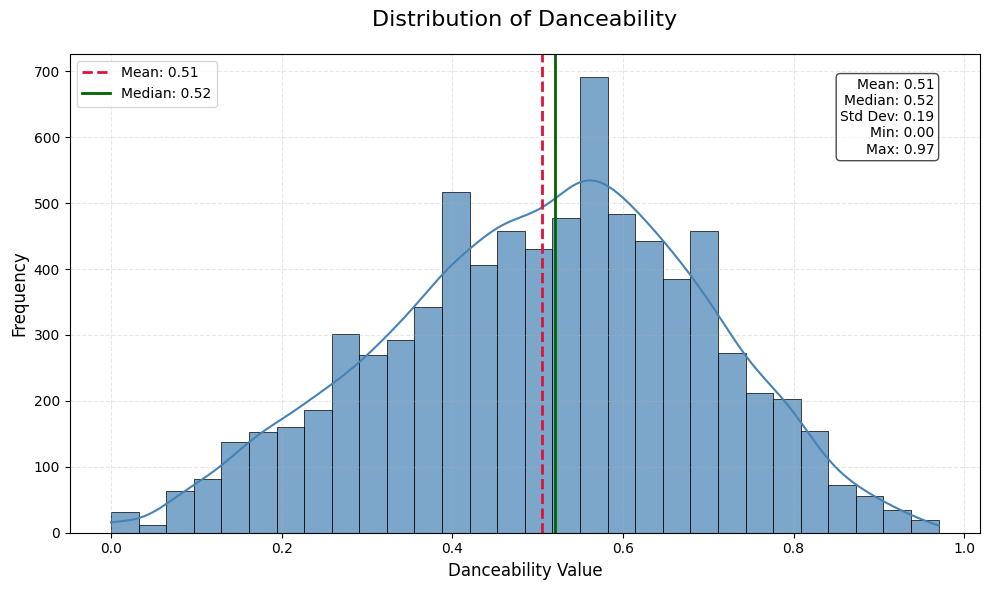

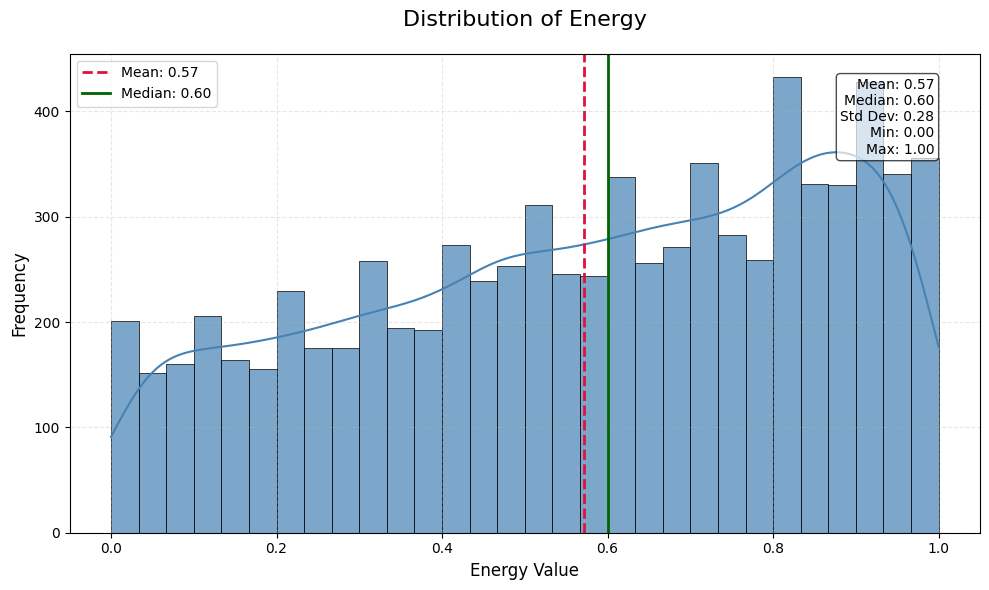

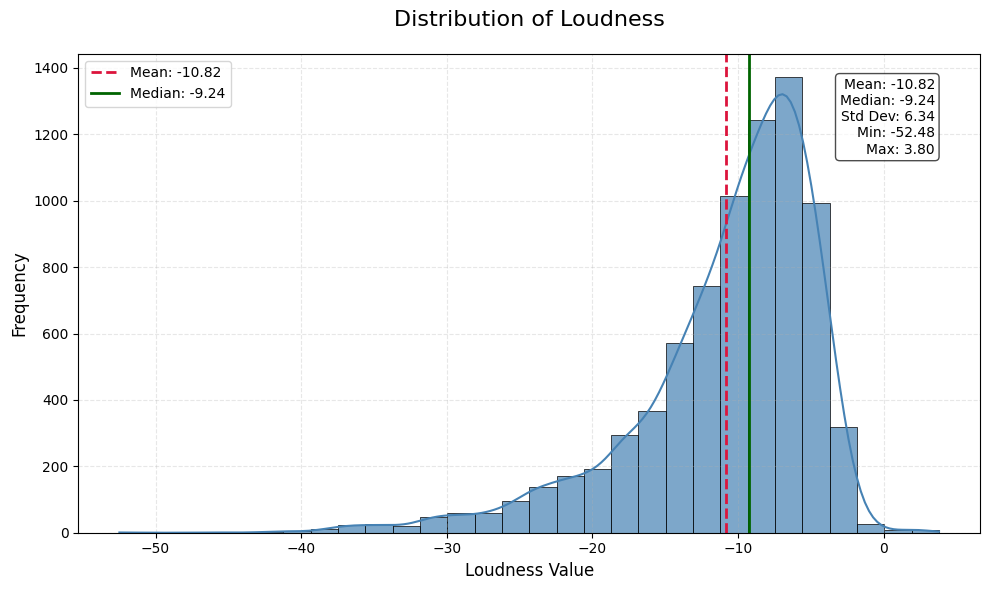

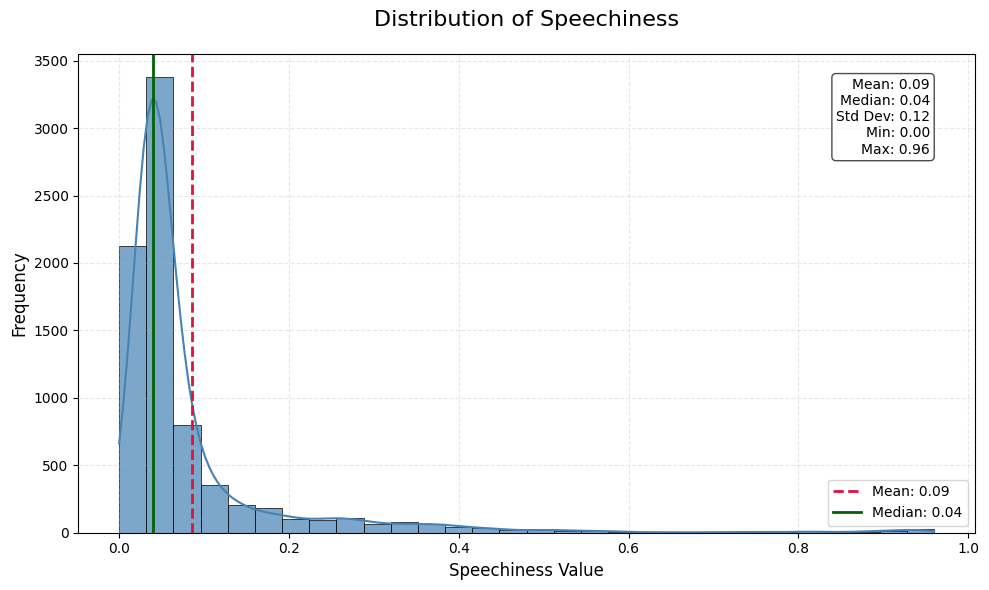

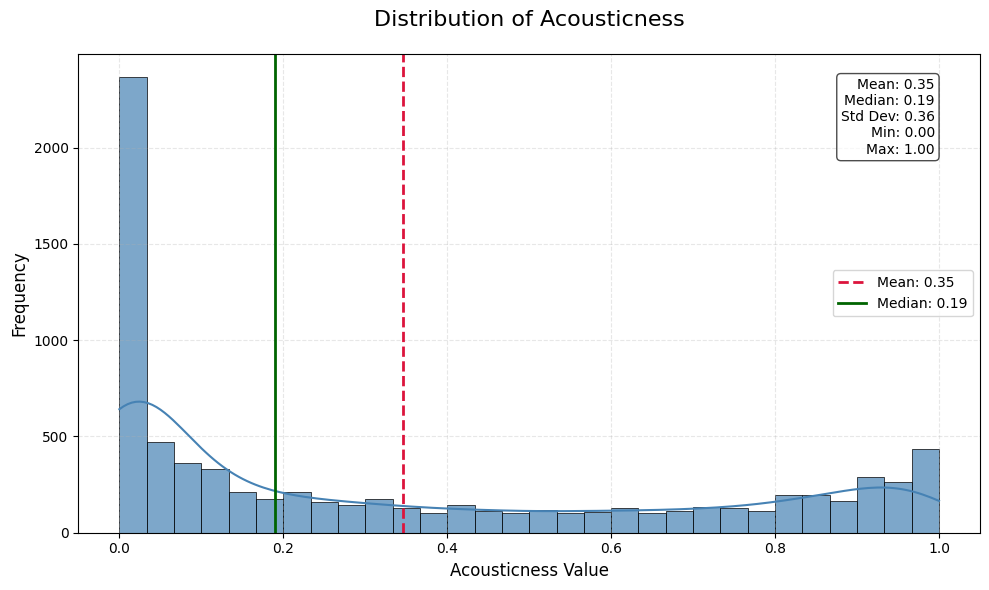

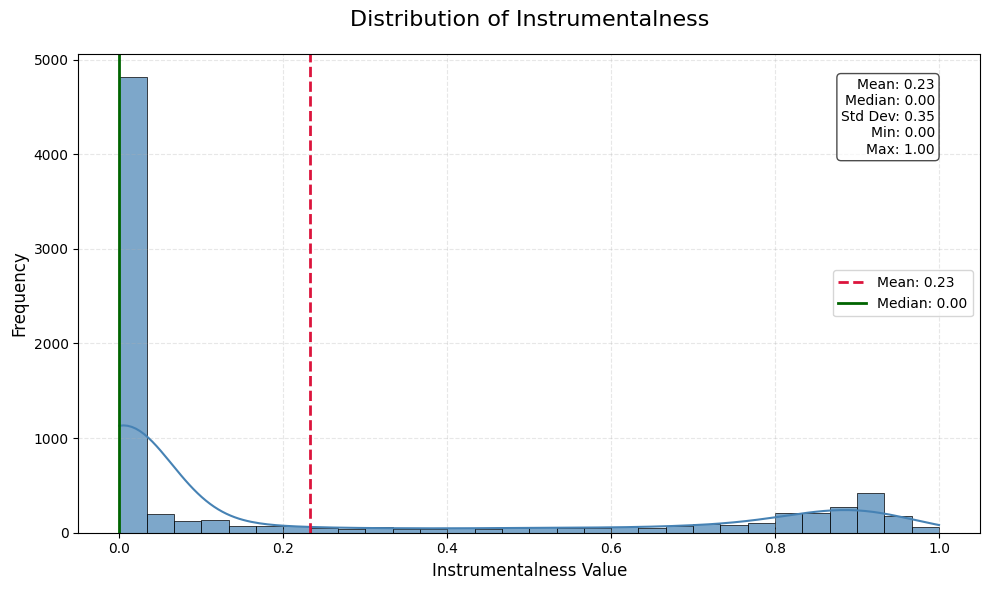

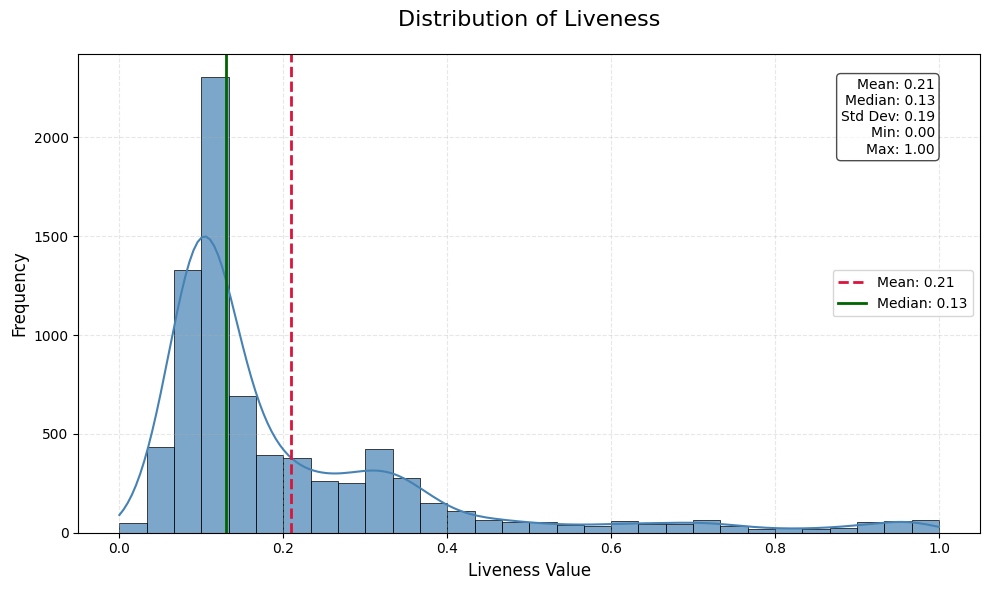

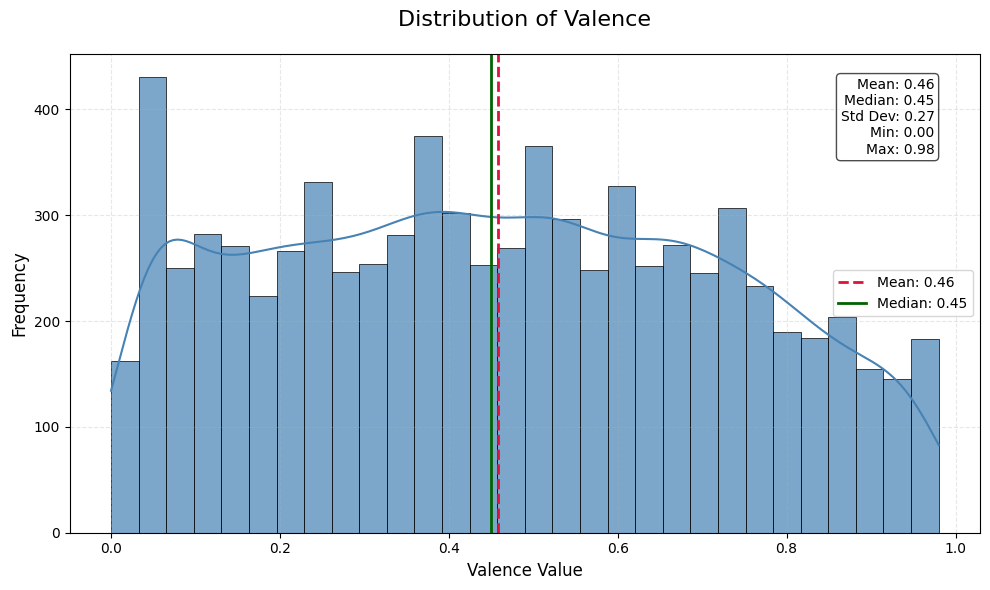

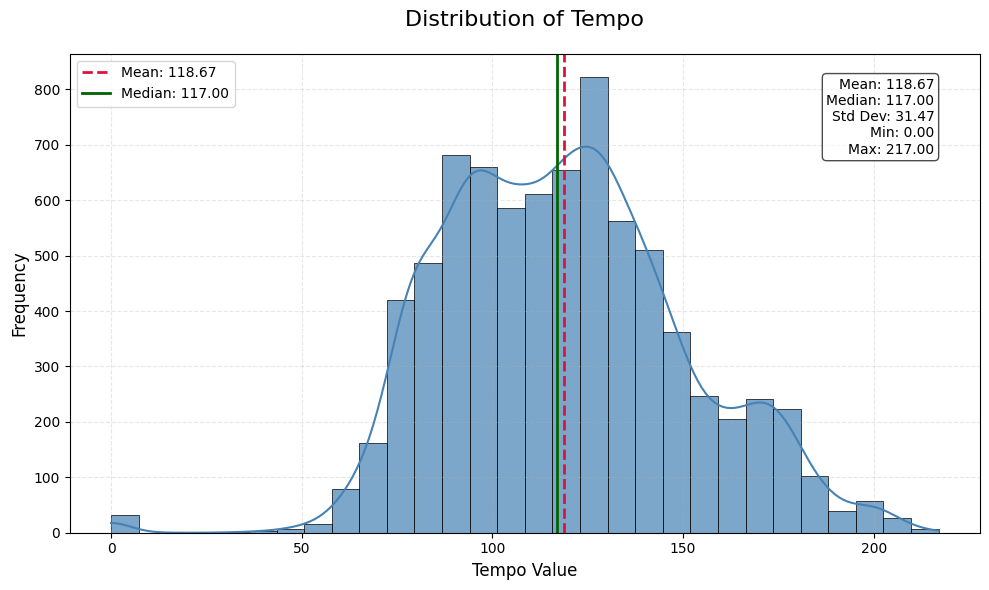

<ipython-input-43-704a537f72b6>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Feature', y='Normalized Value', data=df_melted, palette='viridis')


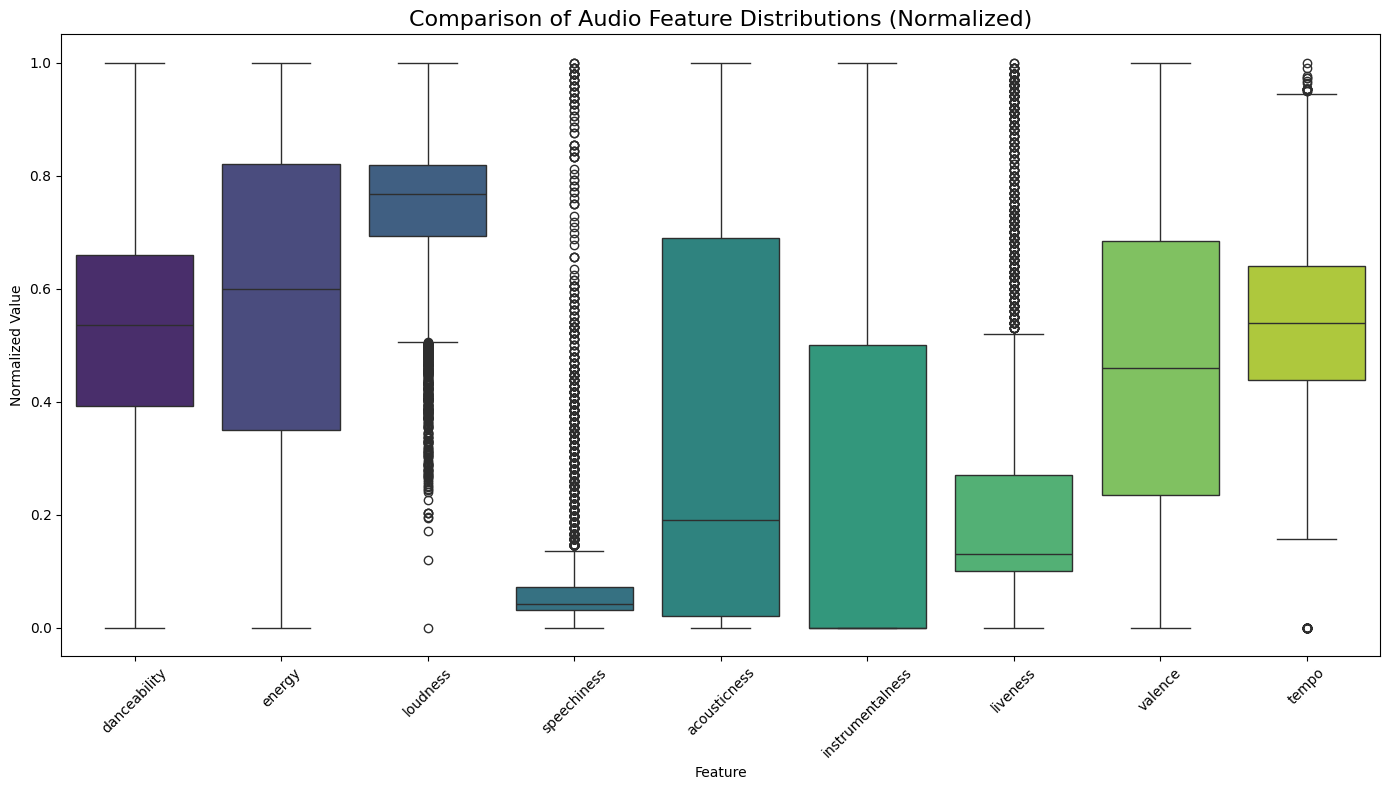

In [43]:
# Define all audio features to visualize
all_features = ['danceability', 'energy', 'loudness', 'speechiness',
               'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Create separate plots for each feature with enhanced styling
for feature in all_features:
    plt.figure(figsize=(10, 6))

    # Create main distribution plot with KDE
    ax = sns.histplot(data=df_clean, x=feature, kde=True, color='steelblue',
                    bins=30, alpha=0.7, edgecolor='black', linewidth=0.5)

    # Add vertical line for mean
    plt.axvline(df_clean[feature].mean(), color='crimson', linestyle='--',
                linewidth=2, label=f'Mean: {df_clean[feature].mean():.2f}')

    # Add vertical line for median
    plt.axvline(df_clean[feature].median(), color='darkgreen', linestyle='-',
                linewidth=2, label=f'Median: {df_clean[feature].median():.2f}')

    # Add descriptive title and labels
    plt.title(f'Distribution of {feature.capitalize()}', fontsize=16, pad=20)
    plt.xlabel(f'{feature.capitalize()} Value', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    # Add descriptive statistics as text
    stats_text = (f"Mean: {df_clean[feature].mean():.2f}\n"
                  f"Median: {df_clean[feature].median():.2f}\n"
                  f"Std Dev: {df_clean[feature].std():.2f}\n"
                  f"Min: {df_clean[feature].min():.2f}\n"
                  f"Max: {df_clean[feature].max():.2f}")

    # Place the text box in the upper right
    props = dict(boxstyle='round', facecolor='white', alpha=0.7)
    plt.text(0.95, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=10,
            verticalalignment='top', horizontalalignment='right', bbox=props)

    # Add legend
    plt.legend()

    # Add grid for better readability
    plt.grid(True, alpha=0.3, linestyle='--')

    # Add tight layout and save figure
    plt.tight_layout()
    plt.savefig(f'{feature}_distribution.png', dpi=300)
    plt.show()

# Create a boxplot for all features (normalized) to compare distributions
plt.figure(figsize=(14, 8))

# Create a copy of the dataframe with normalized features for comparison
df_normalized = df_clean.copy()

# Normalize each feature to 0-1 scale for comparison
for feature in all_features:
    if feature in df_normalized.columns:
        min_val = df_normalized[feature].min()
        max_val = df_normalized[feature].max()
        df_normalized[feature] = (df_normalized[feature] - min_val) / (max_val - min_val)

# Create a melted dataframe for the boxplot
df_melted = pd.melt(df_normalized, value_vars=all_features, var_name='Feature', value_name='Normalized Value')

# Create the boxplot
sns.boxplot(x='Feature', y='Normalized Value', data=df_melted, palette='viridis')
plt.title('Comparison of Audio Feature Distributions (Normalized)', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('audio_features_comparison.png', dpi=300)
plt.show()

In [44]:
print("Data cleaning process completed successfully!")

Data cleaning process completed successfully!
